<a href="https://colab.research.google.com/github/keithvtls/Numerical-Method-Activities/blob/main/Midterm/58015_CurveFitting_Yon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Members:

D.M. Fajardo © 2021

I.J. Timbungco © 2021

M.A. Rodriguez © 2021

N.K. Vitales © 2021

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Problem:

Determining people who have diabetes that is high sugar level with high blood pressure.

In [ ]:
diabetes_data = datasets.load_diabetes()

In [ ]:
diabetes_data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
diabetes = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [ ]:
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
X = diabetes['bp'].values.reshape(-1,1)
y = diabetes['s6'].values.reshape(-1,1)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('w0:', regr.intercept_)
print('w1:', regr.coef_)

w0: [-3.90207094e-16]
w1: [[0.39042938]]


### Multiple Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_summary = pd.DataFrame(['bp'], columns=['Features'])
model_summary['Weights Raw'] = model.coef_
model_summary = model_summary.append({'Features':'Intercept', 'Weights Raw':float(model.intercept_)}, ignore_index=True)
model_summary

,Features,Weights Raw
0,bp,0.401152
1,Intercept,0.001268


In [ ]:
preds = model.predict(X_test)
out = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': preds.flatten()})

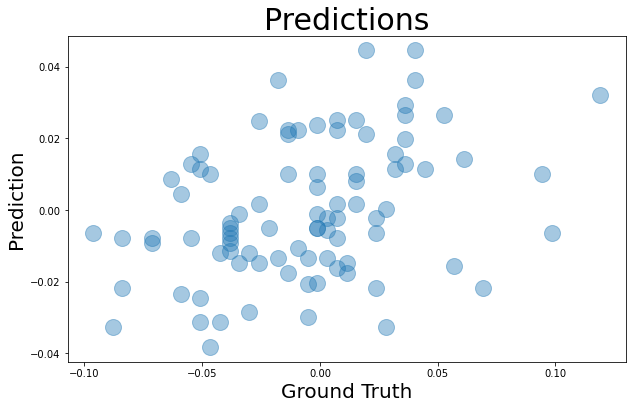

In [ ]:
plt.figure(figsize=(5*2,3*2))
plt.title('Predictions', fontsize=30)

plt.scatter(y_test, preds, s = 256,  alpha=0.4)
plt.xlabel('Ground Truth', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

plt.show()

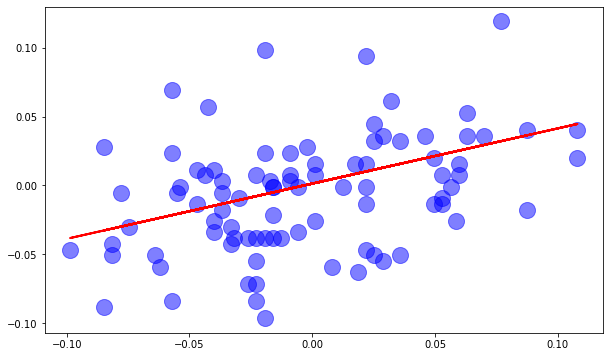

In [ ]:
plt.figure(figsize=(5*2,3*2))
plt.scatter(X_test, y_test,  s = 256, color='blue', alpha=0.5)
plt.plot(X_test, preds, color='red', linewidth=2)
plt.show()

### Normal Equation

In [ ]:
n = len(diabetes['bp']) #no. rows
x_bias =np.ones((n,1)) #column-1 of Matrix X
x_new = np.reshape(X,(n,1)) #reshaping the data
x_new =np.append(x_bias,x_new,axis=1) #forming Matrix X
x_new_transpose = np.transpose(x_new) #transpose
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new) #matrix multiplication
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new) #inverse of a matrix
temp_2 = x_new_transpose.dot(y)

In [ ]:
#Finding coefficients:

theta = temp_1.dot(temp_2)
Intercept = theta[0]
Slope = theta[1]
print("Intercept:",Intercept)
print("Slope:",Slope)

Intercept: [-3.91352277e-16]
Slope: [0.39042938]


In [ ]:
#Predicting values:
def predict_value(input_feature,slope,intercept):
    return slope*input_feature+intercept

In [ ]:
bmi =3
prediction =predict_value(bmi,Slope,Intercept)
print(prediction)

[1.17128814]


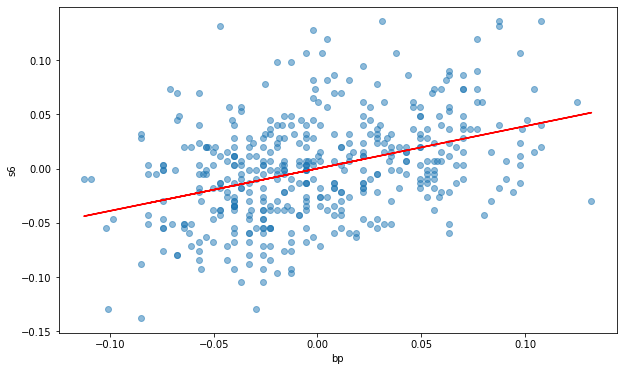

In [ ]:
#Plotting the regression Line:
plt.figure(figsize=(5*2,3*2))
plt.scatter(X,y, alpha=0.5)
plt.xlabel('bp')
plt.ylabel('s6')
plt.plot(X,Slope*X+Intercept, color="red")

### Polynomial curve

In [ ]:
def linear_regressor(X,y):
  X = np.array(X)
  y = np.array(y)
  n = X.size
  w0 = (y.mean()*np.sum(X**2)-X.mean()*np.sum(X*y)) / (np.sum(X**2) - n*X.mean()**2)
  w1 = (np.sum(X*y) - X.mean()*np.sum(y)) / (np.sum(X**2) - n*X.mean()**2)
  return w0,w1
w0,w1 = linear_regressor(X,y)
print("Linear Regression Equation: y = {:.3f}x + {:.3f}".format(w1, w0))

Linear Regression Equation: y = 0.390x + -0.000


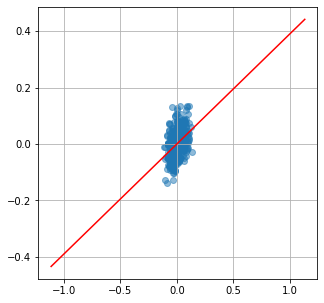

In [ ]:
def show_regline(X,y,w1,w0):
  x_min, x_max = X.min() - 1, X.max() + 1
  linex = np.linspace(x_min, x_max)
  liney = w1*linex+w0
  plt.figure(figsize=(5,5))
  plt.grid()
  plt.scatter(X,y, alpha=0.5)
  plt.plot(linex, liney, c='red')
  plt.show()
show_regline(X,y,w1,w0)

3.9042938039897224


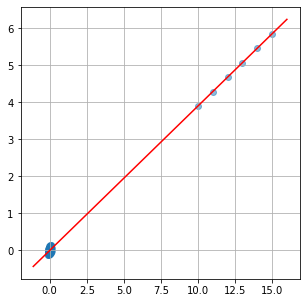

In [ ]:
def lin_reg(val,w0,w1):
  return w1*val + w0 #model
print(lin_reg(10, w0, w1))
X_new, y_new = X.copy(), y.copy()
for i in range(10,16):
  X_new = np.insert(X_new,-1, i)
  y_new = np.insert(y_new,-1, lin_reg(i,w0,w1))
show_regline(X_new, y_new, w1, w0)

In [ ]:
X = diabetes['bp'].values.reshape(-1,1)
y = diabetes['s6'].values.reshape(-1,1)

In [ ]:
X_1 = np.arange(0, 20,1)
y_1 = X_1 - 2 * (X_1 ** 2) + 0.5 * (X_1 ** 3) + np.random.normal(-3, 3, 20)

In [ ]:
def show_regline(X,y,w1,w0):
  x_min, x_max = X.min() - 1, X.max() + 1
  linex = np.linspace(x_min, x_max)
  liney = w1*linex+w0
  plt.figure(figsize=(5,5))
  plt.grid()
  plt.scatter(X_1,y_1, s = 256, color='blue', alpha=0.5)
  plt.plot(linex, liney, c='red')
  plt.show()

In [ ]:
def linear_regressor(X,y):
  X = np.array(X)
  y = np.array(y)
  n = X.size
  w0 = (y.mean()*np.sum(X**2)-X.mean()*np.sum(X*y)) / (np.sum(X**2) - n*X.mean()**2)
  w1 = (np.sum(X*y) - X.mean()*np.sum(y)) / (np.sum(X**2) - n*X.mean()**2)
  return w0,w1
w0,w1 = linear_regressor(X,y)

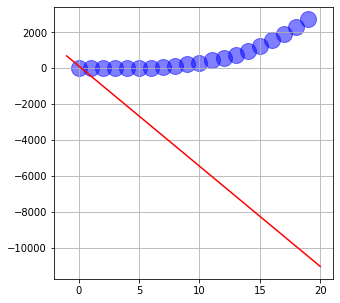

In [ ]:
w0_q,w1_q = linear_regressor(X_1, y_1)
show_regline(X_1,y_1,w0_q,w1_q) 

### References:

[1] D.J Lopez, "Curve Fitting," in Numerical Method, 2021: [**Curve Fitting Techniques**](https://github.com/dyjdlopez/numeth2021/blob/main/Week%209-13%20-%20Curve%20Fitting%20Techniques/NuMeth_4_Curve_Fitting.ipynb)

[2] D.J Lopez, "Applied Linear Regression," in Numerical Method, 2021: [**Linear Regression**](https://github.com/dyjdlopez/numeth2021/blob/main/Week%209-13%20-%20Curve%20Fitting%20Techniques/NuMeth_4_5_Applied_Linear_Regression.ipynb) 

[3] Pratik Shukla (2020): [**Pratik Shukla: Implementation of Simple Linear Regression Using Normal Equation (Matrices)**](https://medium.com/@shuklapratik22/implementation-of-simple-linear-regression-using-normal-equation-matrices-f9021c3590da)